# Fake and real news dataset
### Classifying the news:
Are these tweets real or not?
Purpose of this project is to create a model that lets us classify the new whether its a fake news or not. 
The Data is from Kaggle. There are two datasets: One completely with fake news and other with legit news. Lets read the data now. 

In [79]:
# Libraries : 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [80]:
true = pd.read_csv('true.csv')

In [81]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [82]:
fake = pd.read_csv('Fake.csv')

In [83]:
fake.head() 

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


#### Checking the data type of the columns: 

In [84]:
true.dtypes

title      object
text       object
subject    object
date       object
dtype: object

In [85]:
fake.dtypes

title      object
text       object
subject    object
date       object
dtype: object

#### Add a flag/target variable: 

In [86]:
true['flag'] = 'True'
fake['flag'] = 'Fake'

#### lets merge both the dataset into one. 

In [87]:
data = pd.concat([fake, true]).reset_index(drop = True)

In [88]:
data.head() 

,title,text,subject,date,flag
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


#### Lets see the number of fake news and legit news

In [89]:
data.flag.value_counts() 

Fake    23481
True    21417
Name: flag, dtype: int64

#### There are 23481 news that are fake, and 21417 news thats legit. 

#### Lets shuffle the dataframe:

In [90]:
from sklearn.utils import shuffle 
data = shuffle(data)
data = data.reset_index(drop = True)

In [91]:
data.head() 

,title,text,subject,date,flag
0,SUPER BOWL CHAMP PLAYER Busts Into WH Press Br...,IT S INTERESTING THAT A LIGHTHEARTED MOMENT LI...,left-news,"Apr 19, 2017",Fake
1,Top Democrat says Trump firing of Mueller coul...,WASHINGTON (Reuters) - The top Democrat on the...,politicsNews,"December 20, 2017",True
2,Prosecutors will not pursue Bridgegate charges...,(Reuters) - New Jersey prosecutors on Friday s...,politicsNews,"January 27, 2017",True
3,Trump says democracy must be restored in Venez...,NEW YORK (Reuters) - President Donald Trump sa...,worldnews,"September 18, 2017",True
4,Michelle Obama Just BLASTED Conservatives For...,"On Saturday, Michelle Obama graced Jackson Sta...",News,"April 24, 2016",Fake


In [92]:
# Checking for null values: 
data.isnull().sum() 

title      0
text       0
subject    0
date       0
flag       0
dtype: int64

#### No null values 

#### Remove the date as its not needed for our classification

In [93]:
data.drop(['date'], axis = 1, inplace= True)

#### Remove the title column as we are classifying based on the text: 

In [94]:
data.drop(['title'], axis = 1, inplace= True)

In [95]:
data.head() 

,text,subject,flag
0,IT S INTERESTING THAT A LIGHTHEARTED MOMENT LI...,left-news,Fake
1,WASHINGTON (Reuters) - The top Democrat on the...,politicsNews,True
2,(Reuters) - New Jersey prosecutors on Friday s...,politicsNews,True
3,NEW YORK (Reuters) - President Donald Trump sa...,worldnews,True
4,"On Saturday, Michelle Obama graced Jackson Sta...",News,Fake


In [96]:
# Lets see the text sample: 
i = 1 
for text in data['text'][0:3]: 
    print(str(i) +') ' + text)
    print() 
    i += 1

1) IT S INTERESTING THAT A LIGHTHEARTED MOMENT LIKE THE ONE BELOW COULD CAUSE SUCH ANGER AND OUTRAGE FROM THE LEFT!Rob Gronkowksi popped into today s White House press briefing to ask Sean Spicer if he needed any help. Spicer, a Patriots fan, declined the offer. Mild laughs were had. Gronkowski then disappeared, presumably to cause more mischief in other parts of the building.It s not surprising that the tight end performed a bit like this. That he was wearing a shirt while doing it was a bit of a shock.Right after this video was posted Facebook comments were brutal about how unprofessional it was to have this guy pop into the briefing. We had Obama s antics for 8 years and these people can t take one light moment like this?The left went nuts with faux outrage: We can think of many moments during the Obama administration where some  unprofessional  antics took place. The only problem is that these  antics  are much more serious Remember Jay Carney? Well, here are 6 big moments he s cau

In [97]:
# convert the text into lower case 
data['text'] = data['text'].str.lower()

In [98]:
# Lets see the text sample: 
i = 1 
for text in data['text'][0:3]: 
    print(str(i) +') ' + text)
    print() 
    i += 1

1) it s interesting that a lighthearted moment like the one below could cause such anger and outrage from the left!rob gronkowksi popped into today s white house press briefing to ask sean spicer if he needed any help. spicer, a patriots fan, declined the offer. mild laughs were had. gronkowski then disappeared, presumably to cause more mischief in other parts of the building.it s not surprising that the tight end performed a bit like this. that he was wearing a shirt while doing it was a bit of a shock.right after this video was posted facebook comments were brutal about how unprofessional it was to have this guy pop into the briefing. we had obama s antics for 8 years and these people can t take one light moment like this?the left went nuts with faux outrage: we can think of many moments during the obama administration where some  unprofessional  antics took place. the only problem is that these  antics  are much more serious remember jay carney? well, here are 6 big moments he s cau

In [99]:
# Cleaning the text: 
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

data['clean_text'] = data.text.apply(remove_special_characters)

In [100]:
data.head() 

,text,subject,flag,clean_text
0,it s interesting that a lighthearted moment li...,left-news,Fake,it s interesting that a lighthearted moment li...
1,washington (reuters) - the top democrat on the...,politicsNews,True,washington reuters the top democrat on the us...
2,(reuters) - new jersey prosecutors on friday s...,politicsNews,True,reuters new jersey prosecutors on friday said...
3,new york (reuters) - president donald trump sa...,worldnews,True,new york reuters president donald trump said ...
4,"on saturday, michelle obama graced jackson sta...",News,Fake,on saturday michelle obama graced jackson stat...


In [101]:
# Lets see the text sample: 
i = 1 
for text in data['text'][0:3]: 
    print(str(i) +') ' + text)
    print() 
    i += 1

1) it s interesting that a lighthearted moment like the one below could cause such anger and outrage from the left!rob gronkowksi popped into today s white house press briefing to ask sean spicer if he needed any help. spicer, a patriots fan, declined the offer. mild laughs were had. gronkowski then disappeared, presumably to cause more mischief in other parts of the building.it s not surprising that the tight end performed a bit like this. that he was wearing a shirt while doing it was a bit of a shock.right after this video was posted facebook comments were brutal about how unprofessional it was to have this guy pop into the briefing. we had obama s antics for 8 years and these people can t take one light moment like this?the left went nuts with faux outrage: we can think of many moments during the obama administration where some  unprofessional  antics took place. the only problem is that these  antics  are much more serious remember jay carney? well, here are 6 big moments he s cau

In [102]:
# Removing stopwords: 
import nltk
from nltk.corpus import stopwords
stopword = stopwords.words('english')

In [105]:
data['clean_text'] = data['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopword)]))

In [110]:
# Lets see the text sample: 
i = 1 
for text in data['clean_text'][0:3]: 
    print(str(i) +') ' + text)
    print() 
    i += 1

1) interesting lighthearted moment like one could cause anger outrage leftrob gronkowksi popped today white house press briefing ask sean spicer needed help spicer patriots fan declined offer mild laughs had gronkowski disappeared presumably cause mischief parts buildingit surprising tight end performed bit like this wearing shirt bit shockright video posted facebook comments brutal unprofessional guy pop briefing obama antics  years people take one light moment like thisthe left went nuts faux outrage think many moments obama administration unprofessional antics took place problem antics much serious remember jay carney well  big moments caught big lies consider much important happened today top antics white house press briefings obama jay carney funny serious gaffes   said knows  people named hilary rosen obama adviser hilary rosen said ann romney worked day life discovered rosen visited white house numerous times questioned it carney claimed knew  separate women named hilary rosen  

In [109]:
data['clean_text'] = data.clean_text.apply(remove_special_characters)

### EDA: 

In [111]:
data.head() 

,text,subject,flag,clean_text
0,it s interesting that a lighthearted moment li...,left-news,Fake,interesting lighthearted moment like one could...
1,washington (reuters) - the top democrat on the...,politicsNews,True,washington reuters top democrat us senate int...
2,(reuters) - new jersey prosecutors on friday s...,politicsNews,True,reuters new jersey prosecutors friday said wo...
3,new york (reuters) - president donald trump sa...,worldnews,True,new york reuters president donald trump said ...
4,"on saturday, michelle obama graced jackson sta...",News,Fake,saturday michelle obama graced jackson state u...


### Count of subject: 

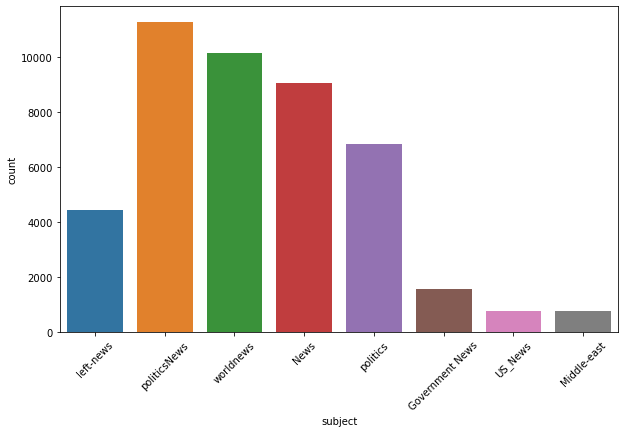

In [120]:
plt.figure(figsize=(10,6))
sns.countplot(data['subject'])
plt.xticks(rotation = 45 );

Most of the news are about Politics, followed by world news. US News and news on Middle east are the least. 

### We can see the Flag-Wise subject:

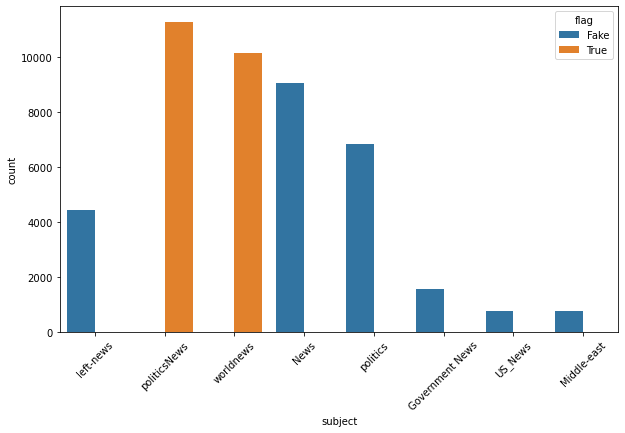

In [133]:
plt.figure(figsize=(10,6))
sns.countplot(data['subject'], hue = data['flag'])
plt.xticks(rotation = 45 );

politicsNews, worldnews are all real news 

In [139]:
data.groupby(['flag'])['text'].count() 

flag
Fake    23481
True    21417
Name: text, dtype: int64

## wordcloud for fake news

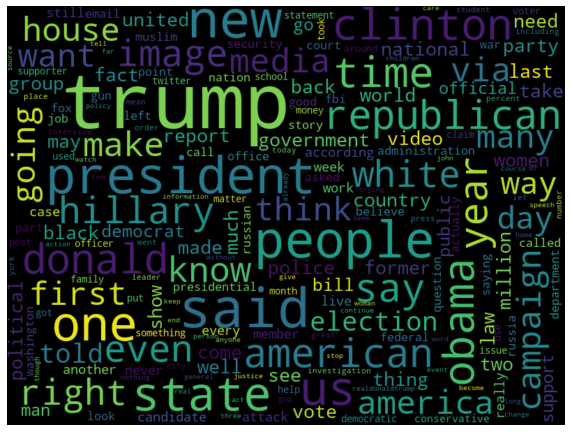

In [142]:
from wordcloud import WordCloud
fake_data = data[data['flag'] == 'Fake']
all_words = ' '.join([text for text in fake_data.clean_text])
wordcloud = WordCloud(width = 800, height = 600, max_font_size = 110, 
                      collocations = False).generate(all_words)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off'); 

### Word cloud for real news

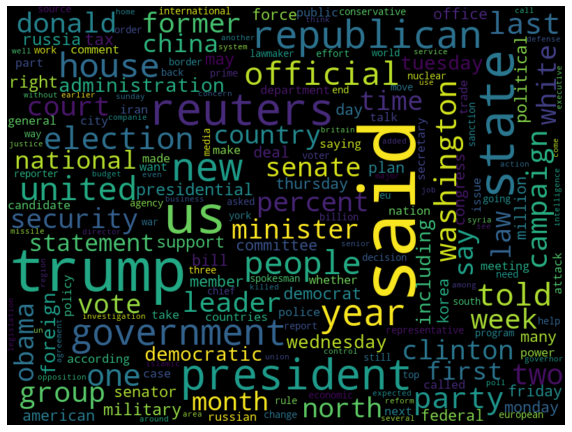

In [143]:
real_data = data[data['flag'] == 'True']
all_words = ' '.join([text for text in real_data.clean_text])
wordcloud = WordCloud(width = 800, height = 600, max_font_size = 110, 
                      collocations = False).generate(all_words)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off'); 

### Most frequent words: 

In [144]:
from nltk import tokenize 
token = tokenize.WhitespaceTokenizer() 
def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

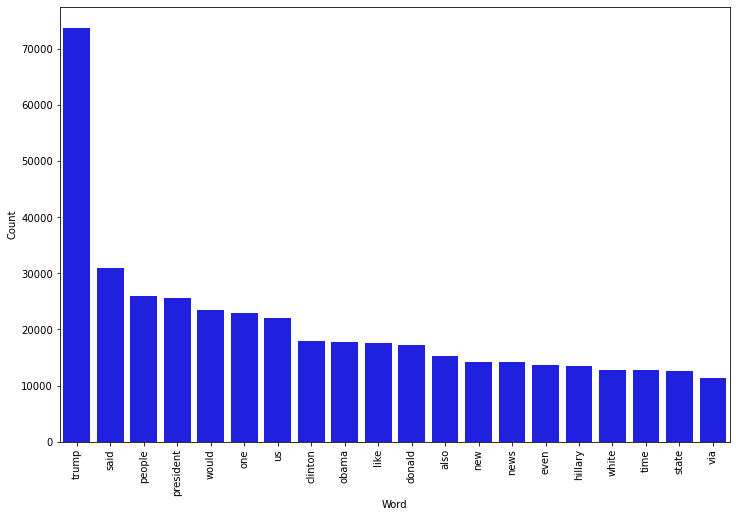

In [145]:
counter(data[data['flag'] == 'Fake'], 'clean_text', 20) 

### Trump is the most frequent word in fake news

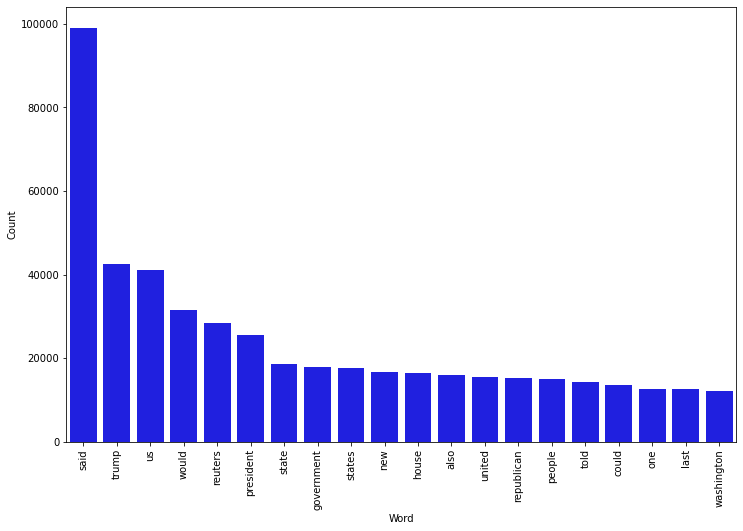

In [146]:
counter(data[data['flag'] == 'True'], 'clean_text', 20) 